# The bit flip code
Quantum error correction is needed for quantum computers, and here in this code a quantum error simulation was added to simulate the quantum errors appeared in quantum computers.


The bit flip code increases the probability (1-p), which is the probability that a state can be transmitted correctly. By using the three-qubit repetition code, the probability of 1-p can be increased to $(1-p)^3$+ $3p(1-p)^2$.

In [1]:
# Import libraries for use
from qiskit import *
import numpy as np
from random import random
from qiskit.extensions import Initialize
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
## SETUP
# Protocol uses 4 qubits and 2 classical bit in a register
qr = QuantumRegister(4, name="q")    # Protocol uses 4 qubits
cr1 = ClassicalRegister(1, name="cr1") # and 2 classical bit
cr2 = ClassicalRegister(1, name="cr2")
bit_flip_circuit = QuantumCircuit(qr, cr1, cr2)

In [3]:
def encoding(qc, q0, q1, q2):
    """Creates encoding process using qubits q0 & q1 & q2"""
    qc.cx(q0,q1) # CNOT with q1 as control and q0 as target
    qc.cx(q0,q2) # CNOT with q2 as control and q0 as target

Here we create $\left|\psi\right\rangle$ from the state $\left|0\right\rangle$ and initialize the state to $\left|\psi\right\rangle$= $\sqrt{p}\left|0\right\rangle +\sqrt{1-p}\left|1\right\rangle $ to simulate the probability of the occurrence of error.

In [4]:
# initialization instruction to create  
# |ψ⟩ from the state |0⟩:  
p = 0.3 # p stands for the probability of fliping the state of the qubit
psi = [np.sqrt(p), np.sqrt(1-p)]
init_gate = Initialize(psi) # initialize the superposition state
init_gate.label = "init"

In [5]:
def error_simulation(qc, q0, q1, q2, q3):
    """Creates error simulation using qubits q0 & q1 & q2 & q3"""
    bit_flip_circuit.append(init_gate, [3]) # create the superposition state for |q3>
    measure(bit_flip_circuit, 3, 0) # measure the state on |q3>
    qc.x(q0).c_if(cr1, 0) # apply x gate on q0 if |0> was measured by |q3>
    bit_flip_circuit.append(init_gate, [3])
    measure(bit_flip_circuit, 3, 0)
    qc.x(q1).c_if(cr1, 0) # apply x gate on q1 if |0> was measured by |q3>
    bit_flip_circuit.append(init_gate, [3])
    measure(bit_flip_circuit, 3, 0)
    qc.x(q2).c_if(cr1, 0) # apply x gate on q2 if |0> was measured by |q3>

In [6]:
def measure(qc, q0, cr):
    """Measures qubit q0 """
    qc.barrier()
    qc.measure(q0,cr)

In [7]:
def decoding(qc, q0, q1, q2):
    """Creates decoding process using qubits q0 & q1 & q2"""
    qc.cx(q0,q1) # CNOT with q1 as control and q0 as target
    qc.cx(q0,q2) # CNOT with q2 as control and q0 as target
    bit_flip_circuit.ccx(q2,q1,q0) # Apply a Toffoli gate |011> <-> |111>

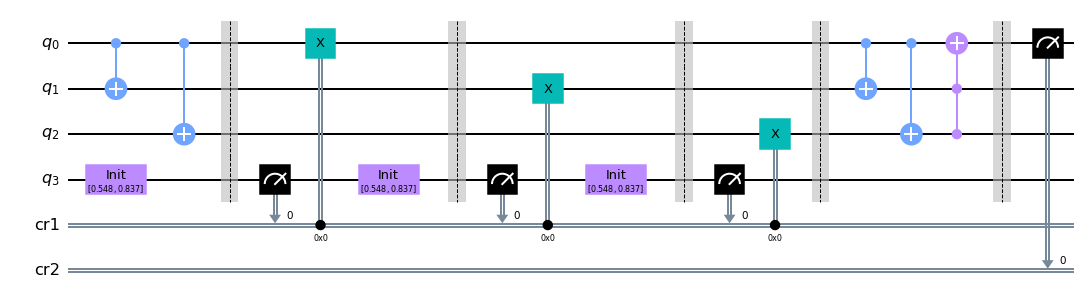

In [8]:
# Let's apply the process above to our circuit:

# step 1. encoding
encoding(bit_flip_circuit, 0, 1, 2)

# step 2. error simulation
error_simulation(bit_flip_circuit, 0, 1, 2, p)
bit_flip_circuit.barrier()

# step 3. decoding
decoding(bit_flip_circuit, 0, 1, 2)

# step 4. measurement
measure(bit_flip_circuit, 0, 1)

# View the circuit:
%matplotlib inline
bit_flip_circuit.draw(output='mpl')

# Measurement result
The result shows that the sum of the probability = 0.145 + 0.624 = 0.769, which is higher than 1-p = 0.7. And hence shows the probability is higher while applying the bit flip code.

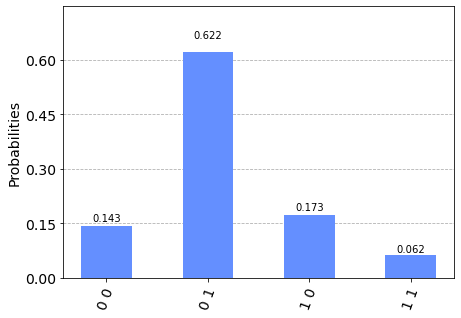

In [9]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(bit_flip_circuit, backend, shots=1024).result().get_counts() # No. of measurement shots = 1024
plot_histogram(counts)

# Decoding result analysis
The table below shows the result before and after the decoding process. 

The probability of the decoding result also depends on the probability of the error simulation.

| Before Decoding |  | After decoding |
| :- | -: | :-: |
| 000 | |000 | 
| 001 | |001 | 
| 010 | |010 | 
| 011 | |111 | 
| 100 | |011 | 
| 101 | |110 | 
| 110 | |101 | 
| 111 | |100 | 